#This Notebook is the final solution, of Pneumonia Detection
After running through various models, the best classification model (VGG16) has been saved and the Mobile net for bounding box predictions has been saved.

This notebook an image as JPG (1024x1024) as a "filename", the predeict_pneumonia method is called which predict pneumonia and if confirmed,the region is marked.

In [2]:
import numpy as np
import pandas as pd
import cv2
import os
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
converted_imgs_dir = "/content/drive/My Drive/CAPSTONE-PROJECT/rsna/convert_train_images1"
VGG_MODEL="/content/drive/My Drive/CAPSTONE-PROJECT/dev/VGG16Model"
BB_MODEL="/content/drive/My Drive/CAPSTONE-PROJECT/dev/bb_mobilenet_model"

#Load Bounding Box Model
bb_model = load_model(BB_MODEL)

In [5]:
#Load VGG Model
vgg_model = load_model(VGG_MODEL)

In [15]:
IMAGE_SIZE = 224
image_width,image_height=1024,1024
stroke=2

def get_image(im, region):
  x1 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
  y1 = int(region[1] * image_height / IMAGE_SIZE)

  x2 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
  y2 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)
  rgb = np.floor(np.random.rand(3) * 256).astype('int')

  im[y1:y1 + stroke, x1:x2] = rgb
  im[y2:y2 + stroke, x1:x2] = rgb
  im[y1:y2, x1:x1 + stroke] = rgb
  im[y1:y2, x2:x2 + stroke] = rgb
  return im

In [16]:
def predict_pneumonia(filename):
  try:    
    # read the file resize from 1024 to 224
    unscaled = cv2.imread(filename) # Original image for display
    cv2_imshow(unscaled)
    print()
    print()
    image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE)) # Rescaled image to run the network
    image = (image / 255.).astype(np.float32)
    x=np.array([image])
    
    #predict vgg
    predict = vgg_model.predict(x) # Predict 
    print("Prediction Score:",(predict[0][1]*100),"%")
    if predict[0][1] >0.5:
        print("Oops! Looks Positive for Pneumonia - check below.")
        #predict bounding box
        region = bb_model.predict(x)
        #print(region)
        im = get_image(unscaled,region[0])
        cv2_imshow(im)
    else:
        print("Congrats! Negative: Pneumonia Result")
  except Exception as e:
    print("Oops!Something Went Wrong!", e)
    return
  return


In [18]:
#Change this to predict new XRays
imgs = ["9b838133-a269-416a-a0b5-9dc3ea7d585e","1c44e0a4-4612-438f-9a83-8d5bf919cb67","349f10b4-dc3e-4f3f-b2e4-a5b81448ce87","0d5bc737-03de-4bb8-98a1-45b7180c3e0f"]
idx = imgs[0]
filename = converted_imgs_dir+"/"+idx+".jpg"
filename

'/content/drive/My Drive/CAPSTONE-PROJECT/rsna/convert_train_images1/9b838133-a269-416a-a0b5-9dc3ea7d585e.jpg'

In [13]:
#check if the file exists
!ls "/content/drive/My Drive/CAPSTONE-PROJECT/rsna/convert_train_images1/349f10b4-dc3e-4f3f-b2e4-a5b81448ce87.jpg"

'/content/drive/My Drive/CAPSTONE-PROJECT/rsna/convert_train_images1/349f10b4-dc3e-4f3f-b2e4-a5b81448ce87.jpg'


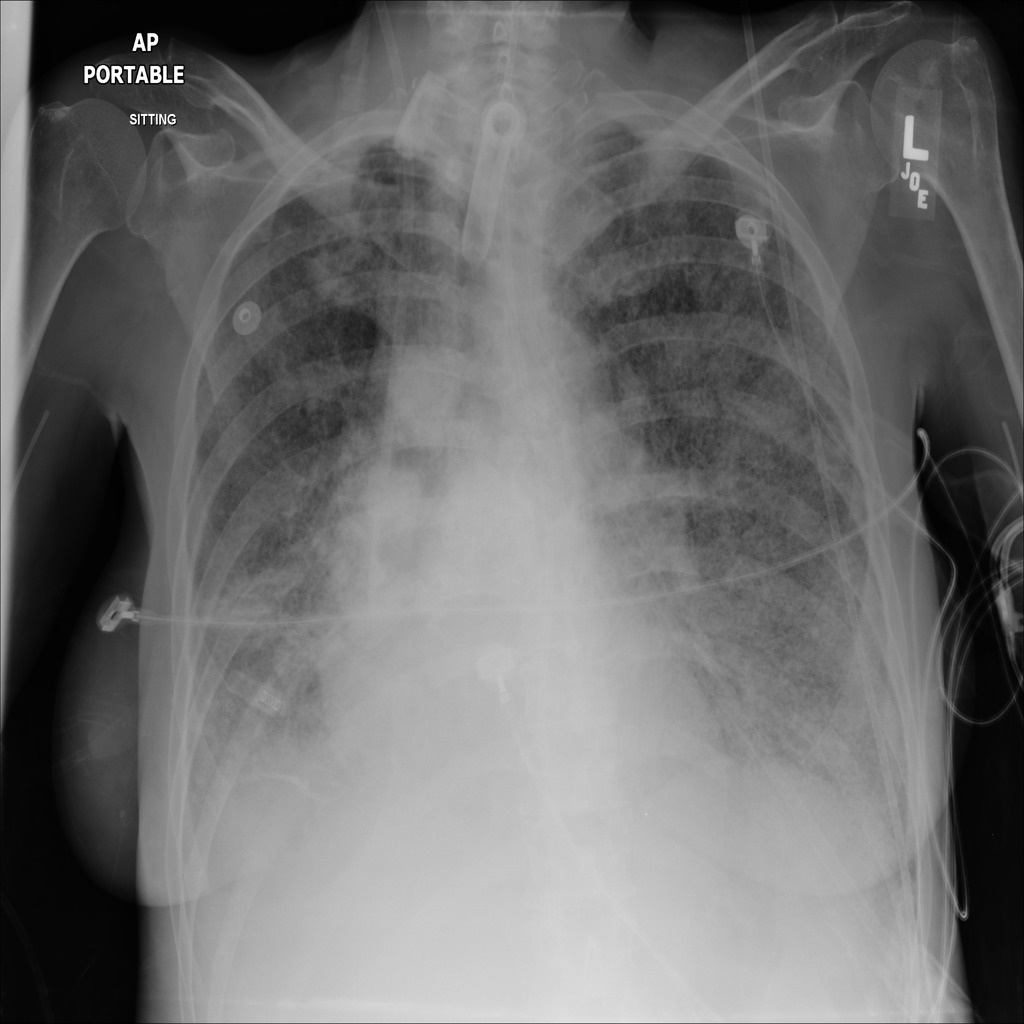



Prediction Score: 99.80064034461975 %
Oops! Looks Positive for Pneumonia - check below.


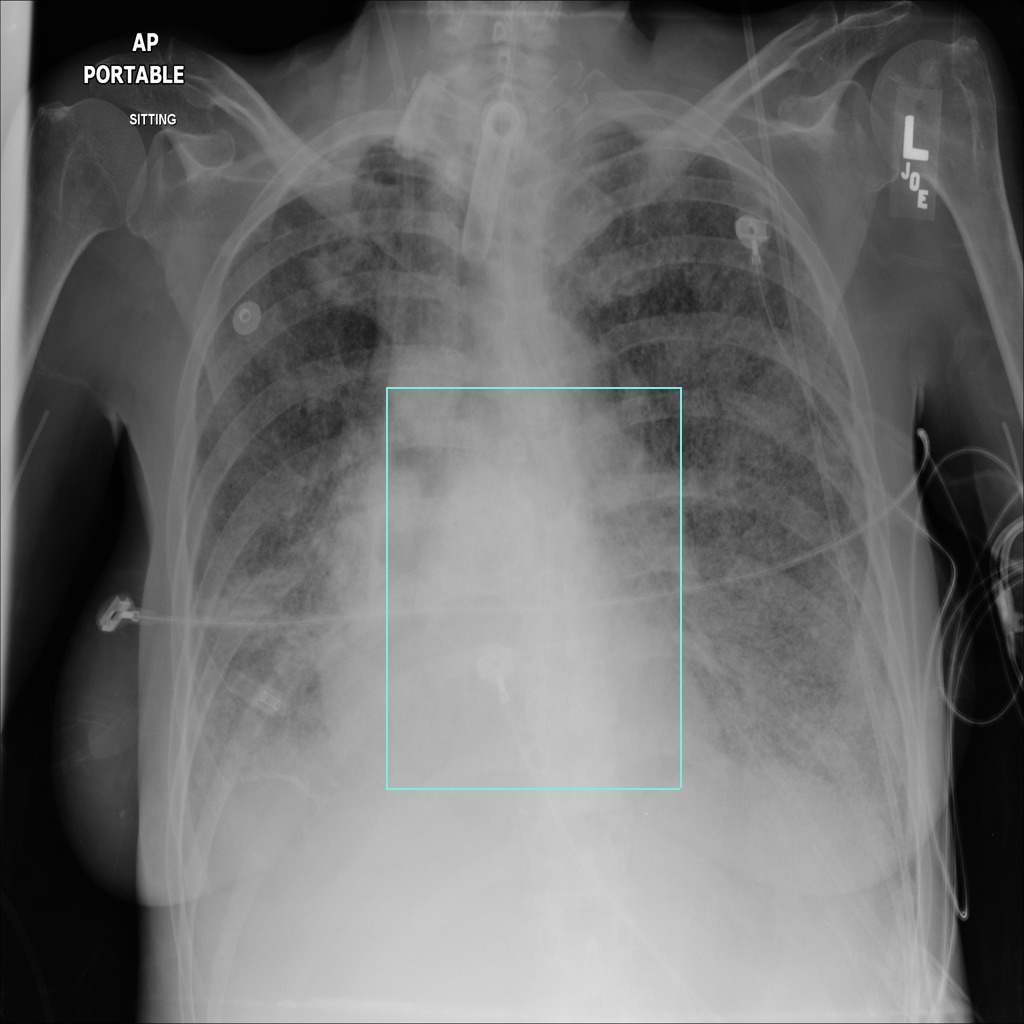

In [19]:
predict_pneumonia(filename)

Summary:
The following have been demonstarted above
- Created models, trained and validated for accuracy
- Saved the model for reuse
- Loaded the model successfully
- implemented methods to easily to access the model and predict on any XRay
- Both classify and predict the presence of pneumonia and the afeected region
- Using the code and approach, we can deploy this model to the cloud